# Graphillionに触れてみよう

いよいよGraphillionの解説に入ります．まずははじめに数え上げお姉さん問題を紹介し，それをGraphillionを使ってどのように解くかを具体的なコードを交えて解説します．Graphillionの機能の詳細および内部でどのような処理が走っているのかについては次章以降で解説します．

## 数え上げお姉さん問題

まずは以下の動画を御覧ください．

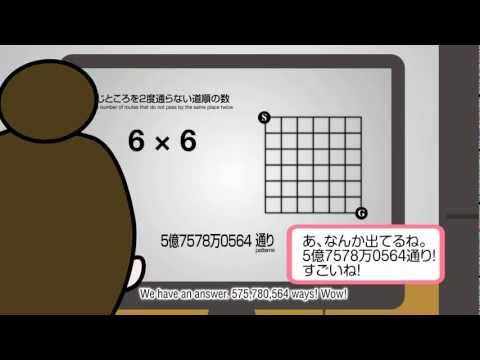

In [11]:
from IPython.display import YouTubeVideo

YouTubeVideo("Q4gTV4r0zRs")

この動画で取り上げている問題を**数え上げお姉さん問題**とよぶことにします．動画ではチェスボードのような形をしたグラフの角の頂点間の経路の総数を調べ上げていました．そのような経路の総数はグラフが大きくなるにつれて指数的に増加するため，全ての経路を一つずつ数え上げると天文学的な時間がかかてしまいます．この問題をGraphilionを用いて解く方法を説明します．

## Graphillion はじめの一歩

公開されているGraphillionライブラリには数え上げお姉さん問題を解く方法実演するためのモジュールが含まれています．今回はそのモジュールを用いて数え上げお姉さん問題を解いていきます．


Colabを利用していて，Graphillionのインストールがまだの方は以下のセルを実行することでGraphillionとチュートリアル用のモジュールをインストールできます．

In [0]:
!pip install graphillion
!git clone https://github.com/nsnmsak/graphillion_tutorial
!cp graphillion_tutorial/ja/tutorial_util.py .

次にgraphillionモジュールから`GraphSet`と`tutorial`をインポートします．

In [0]:
from graphillion import GraphSet, tutorial
from tutorial_util import draw_subgraph, draw_universe

`GraphSet`はGraphillionの中心的な役割を果たすクラスであり，グラフの集合を扱う各種メソッドが実装されています．`tutorial`モジュールにはGraphillionのWebページに掲載されている[チュートリアル](https://github.com/takemaru/graphillion/wiki#%E3%83%81%E3%83%A5%E3%83%BC%E3%83%88%E3%83%AA%E3%82%A2%E3%83%AB) のための補助的な関数が実装されています．`draw_subgraph`はこのチュートリアルのために用意した，グラフ描画のための補助関数です．

では，Graphillionで数え上げお姉さん問題を解いていきましょう．まず問題のグラフを準備します．

In [0]:
grid = tutorial.grid(7, 7)
grid

`tutorial.grid(n, m)`はお姉さん問題で扱っている，格子状のグラフを生成するためのメソッドです．なお，以下ではこのグラフをグリッドグラフとよびます．生成されたグリッドグラフは整数のペアのリストとして表現されています．各整数は頂点の番号を表し，各ペアは頂点間の辺を表しています．



次にこのグリッドグラフ上の経路の集合を表すGraphSetをつくっていきます．まず，`GraphSet`クラスにに経路を考える対象となるグリッドグラフ`grid`を登録します．

In [0]:
GraphSet.set_universe(grid)

Graphillionが扱うグラフの集合は，あるグラフ（以下，*universe*とよぶ）の部分グラフの集合として定義されます．`GraphSet.set_universe()`は，universeを設定するメソッドです．

`draw_universe()`メソッドを用いることでuniverseを描画することができます．



In [0]:
draw_universe()


ではいよいよ数え上げお姉さん問題を解いてみましょう．Graphillionでは以下のメソッドで答えを求めることができます．

In [0]:
paths = GraphSet.paths(1, 64)

`GraphSet.paths(s, t)`は，頂点`s` から`t`までの，ループを含まない全ての経路の集合を表すGraphSetオブジェクトを求めるメソッドです．大きいグラフを扱う場合は実行に時間がかかることもありますが，このチュートリアルで扱う程度の規模のグラフなら一瞬で計算結果が得られるはずです．`paths`は全ての経路の集合を表すGraphSetオブジェクトです．

次に`paths`に含まれる経路の数を求めてみましょう．

In [0]:
len(paths)

Graphillionを用いることで，数え上げお姉さん動画ではスーパーコンピュータで解いていた問題を一瞬で解くことができました．

Graphillionはお姉さん問題を解く以上の豊富な機能を備えています．以下では，`paths`に含まれる経路の中から辺の数が最小のもの，最大のもの，
長さ（辺の数）が最短のもの，最長のものをそれぞれ一つ取り出しています．

In [0]:
shortest_path = next(paths.min_iter())
longest_path = next(paths.max_iter())

draw_subgraph(shortest_path)
draw_subgraph(longest_path)

`draw_subgraph(subgraph)` メソッドを用いると`universe`と`subgraph`とを重ねて描画することができます．

## この章のまとめ

この章では数え上げお姉さん問題と，それをGraphillionを使って解く方法を紹介しました．Graphillionを用いると膨大な数の経路をあっという間に数え上げることができます．Graphillionがなぜ高速に問題を解くことができたかについて[次章](05_graphillion_and_zdd.ipynb)で解説します．

